# Table of contents
1. [Introduction](#introduction)
2. [Numerical relationships](#relplot)
    1. [Sub paragraph](#subparagraph1)
3. [Categorical plots](#catplot)
4. [Distribution plots](#distplot)
5. [Other Types of Plots](#others)
6. [References](#references)


In [ ]:
import seaborn as sns
titanic=sns.load_dataset('titanic')
sns.catplot(data=titanic, x="deck", kind="count", palette="ch:.25")
titanic.dtypes

## Introduction <a id='introduction'> </a>

### 2 interfaces:
1. axes level : returns matplotlib axes object
2. Figure level (***Preferred***) : returns native seaborn FacetGrid object

No native functions for adding chart titles - drop down to pyplot fig object

## Numerical relationships <a id='relplot'></a>

### kind =scatter , line

### visual channels:
1. x
3. y
3. hue
4. style
5. size
6. palette = 'ch:r=-.5,1=.75'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

tips = sns.load_dataset("tips")
scatter=sns.relplot(data=tips, x="total_bill", y="tip",kind='scatter')
scatter.fig.suptitle('Using x and y channels')

# using hue
scatter= sns.relplot(data=tips, x="total_bill", y="tip",hue='smoker')
scatter.fig.suptitle('Using hue channel')

#using style
scatter=sns.relplot(data=tips,x='total_bill',y='tip',hue='smoker',style='time')

#lineplot
dowjones = sns.load_dataset("dowjones")
sns.relplot(data=dowjones, x="Date", y="Price", kind="line")

#subplots with rows
tips = sns.load_dataset("tips")
sns.relplot(data=tips, x="total_bill", y="tip", kind='scatter',hue="smoker",col='time')

#subplots with rows and columns
sns.relplot(data=tips, x="total_bill", y="tip", kind='scatter',hue="smoker",col='time',row='sex')

#trellis chart
fmri=sns.load_dataset('fmri')
sns.relplot(
    data=fmri.query("region == 'frontal'"), kind="line",
    x="timepoint", y="signal", hue="event", style="event",
    col="subject", col_wrap=5,
    height=3, aspect=.75, linewidth=2.5,
)



# Categorical plots <a id='catplot'></a>
**Response variables will be on y-axis on all these plots (except countplot)**

Three different families :
##      a. distribution plots for smaller dataset:
        1. strip
        2. swarm (smallest dataset)

##      b. distribution plots for larger dataset:
        1. boxplot
        2. violinplot
        3. boxenplot (larger dataset)

##      c. average estimates:
        1. pointplot
        2. barplot
        3. countplot (1 axis plot)

catplot support hue but not other channels like size and style


In [ ]:
# categorical distribution for smaller dataset 
tips=sns.load_dataset('tips')
sns.catplot(data=tips,x='day',y='total_bill',kind='strip',jitter=True)
sns.catplot(data=tips,x='day',y='total_bill',kind='swarm', hue='sex') #swarm is okay only for small datasets

# if the category axis needs a certain order either use pandas categorical dtype or order=["No", "Yes"] in seaborn
##================####
# We’ve referred to the idea of “categorical axis”. In these examples, that’s always corresponded to the horizontal axis. But it’s often helpful to put the categorical variable on the vertical axis (particularly when the category names are relatively long or there are many categories). To do this, swap the assignment of variables to axes:
sns.catplot(data=tips,x='total_bill',y='day',hue='time',kind='swarm')

## Distribution plot <a id='distplot'></a>

In [ ]:
# categorical plot for larger dataset
sns.catplot(data=tips, x="day", y="total_bill", kind="box")
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker", kind="box")

#for larger dataset to show the distribution only use boxenplot
#shows more quantiles than a traditional box plot
#boxenplots are better suited for larger datasets, as classic box plots can have too many outliers and do not show as much information about the distribution. The height of the boxes is not important, as the plot is scaled to show all the data points

sns.catplot(data=tips,x='day',y='total_bill',kind='boxen')

In [ ]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker",dodge=False, kind="box")

In [ ]:
# can do entire dataframe with orient h
sns.catplot(data=tips,palette='rainbow',orient='h',kind='box')

In [ ]:
# average estimates
# response variable on y axis except for countplot :
sns.catplot(data=titanic, x="deck", kind="count", palette="ch:.25")
sns.catplot(data=titanic,x='deck',y='survived',kind='bar',errorbar=None,palette='pastel')

#countplot alternative to barplot : 
# shows the gradient i.e. the slope of transition from one category to another a.k.a slopeplot
sns.catplot(data=titanic,x='sex',y='survived',hue='class',kind='point')
#others : ecdf, rug,kde,hist

## References <a id='references'></a>
https://github.com/StephanieStallworth/Exploratory_Data_Analysis_Visualization_Python
https://github.com/derekbanas/seaborn/blob/master/SB%20Tut.ipynb

## Other Types of Plots <a id='others'></a>
pairplot
heatmap,clustermap (https://www.youtube.com/watch?v=crQkHHhY7aY)
jointplot


seaborn.axisgrid.FacetGrid

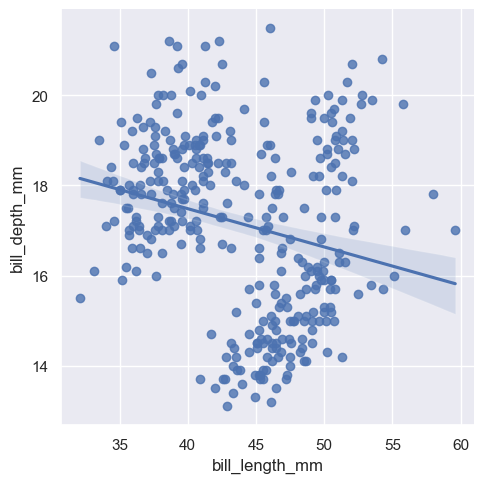

In [12]:
#lmplot : regression
penguins=sns.load_dataset('penguins')
sns.lmplot(data=penguins, x="bill_length_mm", y="bill_depth_mm"))

C:\Users\John\AppData\Local\Temp\ipykernel_5428\3025236277.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  glue=sns.load_dataset('glue').pivot('Model','Task','Score')


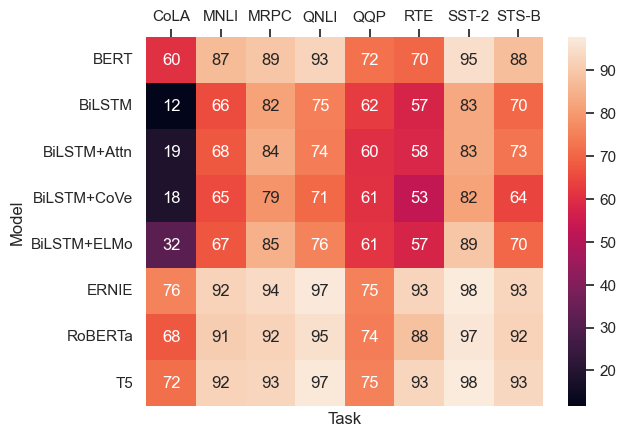

In [18]:
#heatmap
glue=sns.load_dataset('glue').pivot('Model','Task','Score')
ax=sns.heatmap(glue,annot=True)
ax.xaxis.tick_top()

In [19]:
# pairplot
sns.pairplot(penguins, hue="species", diag_kind="hist")

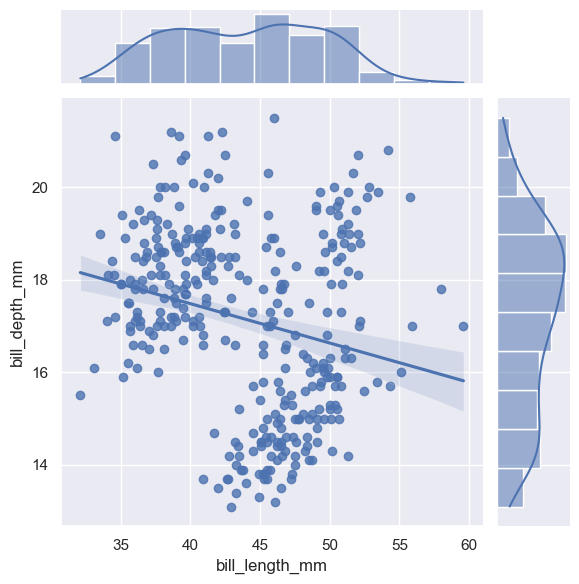

In [22]:
# jointplot
# bivariate analysis
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="reg")